# Predicting Customer Churn with Advanced Machine Learning: A Comprehensive Analysis for Strategic Retention

### **Project Overview:**

This project focuses on building robust predictive models to identify customers at high risk of churning from a telecommunications service. Leveraging a comprehensive dataset with various customer attributes, service details, and financial metrics, the goal is to develop a highly accurate model that can predict customer churn and provide actionable insights into the key drivers of churn. This proactive identification allows the business to implement targeted retention strategies, thereby minimizing revenue loss and enhancing customer lifetime value (CLTV).

---

## **1. Introduction**

Customer churn is a critical challenge for businesses, especially in competitive industries like telecommunications. Losing existing customers can be significantly more expensive than acquiring new ones. This notebook presents a detailed machine learning project aimed at predicting customer churn. We will explore the dataset, preprocess the features, build a robust XGBoost classification model, and discuss its interpretability.

---

## **2. Data Loading and Initial Exploration**

In this section, we load the dataset and perform initial checks to understand its structure, identify data types, and detect any missing values. This step is crucial for comprehending the raw data before any cleaning or preprocessing begins.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from cuml.model_selection import GridSearchCV

### **2.1. Dataset Overview**

We start by loading the `telco.csv` file into a Pandas DataFrame and inspecting the first few rows to get a glimpse of the features and their values.

In [2]:
data = pd.read_csv('telco.csv')
data.head()

,Customer ID,Gender,Age,Under 30,Senior Citizen,Married,Dependents,Number of Dependents,Country,State,...,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Satisfaction Score,Customer Status,Churn Label,Churn Score,CLTV,Churn Category,Churn Reason
0,8779-QRDMV,Male,78,No,Yes,No,No,0,United States,California,...,20,0.00,59.65,3,Churned,Yes,91,5433,Competitor,Competitor offered more data
1,7495-OOKFY,Female,74,No,Yes,Yes,Yes,1,United States,California,...,0,390.80,1024.10,3,Churned,Yes,69,5302,Competitor,Competitor made better offer
2,1658-BYGOY,Male,71,No,Yes,No,Yes,3,United States,California,...,0,203.94,1910.88,2,Churned,Yes,81,3179,Competitor,Competitor made better offer
3,4598-XLKNJ,Female,78,No,Yes,Yes,Yes,1,United States,California,...,0,494.00,2995.07,2,Churned,Yes,88,5337,Dissatisfaction,Limited range of services
4,4846-WHAFZ,Female,80,No,Yes,Yes,Yes,1,United States,California,...,0,234.21,3102.36,2,Churned,Yes,67,2793,Price,Extra data charges


### **2.2. Data Information and Shape**

Understanding the data types and non-null counts is vital for assessing data quality and planning preprocessing steps. `data.info()` provides a concise summary, while `data.shape` gives us the number of rows and columns.

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 50 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        7043 non-null   object 
 1   Gender                             7043 non-null   object 
 2   Age                                7043 non-null   int64  
 3   Under 30                           7043 non-null   object 
 4   Senior Citizen                     7043 non-null   object 
 5   Married                            7043 non-null   object 
 6   Dependents                         7043 non-null   object 
 7   Number of Dependents               7043 non-null   int64  
 8   Country                            7043 non-null   object 
 9   State                              7043 non-null   object 
 10  City                               7043 non-null   object 
 11  Zip Code                           7043 non-null   int64

In [4]:
data.shape

(7043, 50)

### **2.3. Statistical Summary of Numerical Features**

The `data.describe()` method provides a quick statistical summary of numerical columns, offering insights into their distribution, central tendency, and spread.

In [5]:
data.describe()

,Age,Number of Dependents,Zip Code,Latitude,Longitude,Population,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Satisfaction Score,Churn Score,CLTV
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,46.509726,0.468692,93486.070567,36.197455,-119.756684,22139.603294,1.951867,32.386767,22.958954,20.515405,64.761692,2280.381264,1.962182,6.860713,749.099262,3034.379056,3.244924,58.505040,4400.295755
std,16.750352,0.962802,1856.767505,2.468929,2.154425,21152.392837,3.001199,24.542061,15.448113,20.418940,30.090047,2266.220462,7.902614,25.104978,846.660055,2865.204542,1.201657,21.170031,1183.057152
min,19.000000,0.000000,90001.000000,32.555828,-124.301372,11.000000,0.000000,1.000000,0.000000,0.000000,18.250000,18.800000,0.000000,0.000000,0.000000,21.360000,1.000000,5.000000,2003.000000
25%,32.000000,0.000000,92101.000000,33.990646,-121.788090,2344.000000,0.000000,9.000000,9.210000,3.000000,35.500000,400.150000,0.000000,0.000000,70.545000,605.610000,3.000000,40.000000,3469.000000
50%,46.000000,0.000000,93518.000000,36.205465,-119.595293,17554.000000,0.000000,29.000000,22.890000,17.000000,70.350000,1394.550000,0.000000,0.000000,401.440000,2108.640000,3.000000,61.000000,4527.000000
75%,60.000000,0.000000,95329.000000,38.161321,-117.969795,36125.000000,3.000000,55.000000,36.395000,27.000000,89.850000,3786.600000,0.000000,0.000000,1191.100000,4801.145000,4.000000,75.500000,5380.500000
max,80.000000,9.000000,96150.000000,41.962127,-114.192901,105285.000000,11.000000,72.000000,49.990000,85.000000,118.750000,8684.800000,49.790000,150.000000,3564.720000,11979.340000,5.000000,96.000000,6500.000000


### **2.4. Handling Missing Values**

We identify columns with missing values and then strategize on how to handle them. For 'Offer' and 'Internet Type', missing values are imputed to 'No Offer' and 'No Internet Service' respectively, indicating the absence of these services or offers. 'Churn Category' and 'Churn Reason' are dropped as they represent post-churn information and could lead to data leakage, which is detrimental for predictive modeling. 'Customer ID' is also dropped as it's an identifier and not a predictive feature.

In [6]:
missing_values = data.isnull().sum()
columns_with_missing_data = missing_values[missing_values > 0]
print(columns_with_missing_data)

Offer             3877
Internet Type     1526
Churn Category    5174
Churn Reason      5174
dtype: int64


In [7]:
data.columns

Index(['Customer ID', 'Gender', 'Age', 'Under 30', 'Senior Citizen', 'Married',
       'Dependents', 'Number of Dependents', 'Country', 'State', 'City',
       'Zip Code', 'Latitude', 'Longitude', 'Population', 'Quarter',
       'Referred a Friend', 'Number of Referrals', 'Tenure in Months', 'Offer',
       'Phone Service', 'Avg Monthly Long Distance Charges', 'Multiple Lines',
       'Internet Service', 'Internet Type', 'Avg Monthly GB Download',
       'Online Security', 'Online Backup', 'Device Protection Plan',
       'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
       'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charge', 'Total Charges', 'Total Refunds',
       'Total Extra Data Charges', 'Total Long Distance Charges',
       'Total Revenue', 'Satisfaction Score', 'Customer Status', 'Churn Label',
       'Churn Score', 'CLTV', 'Churn Category', 'Churn Reason'],
      dtype='object')

### **2.5. Target Variable Distribution**

It's important to examine the distribution of our target variable (`Churn Label`) to understand class balance. This helps in selecting appropriate evaluation metrics and considering techniques for handling imbalance if necessary.

In [8]:
data['Churn Label'].value_counts()

Churn Label
No     5174
Yes    1869
Name: count, dtype: int64

In [9]:
data['Churn Label'].value_counts(normalize=True)

Churn Label
No     0.73463
Yes    0.26537
Name: proportion, dtype: float64

## **3. Exploratory Data Analysis (EDA) - (Enhancement Opportunity)**

This section is dedicated to visualizing and exploring the relationships between features and the target variable. A thorough EDA helps in gaining deeper insights into the data, identifying patterns, and informing feature engineering decisions.
---

In [10]:
data['Offer'].unique()

array([nan, 'Offer E', 'Offer D', 'Offer C', 'Offer B', 'Offer A'],
      dtype=object)

In [11]:
data['Internet Type'].unique()

array(['DSL', 'Fiber Optic', 'Cable', nan], dtype=object)

In [12]:
data['Churn Category'].unique()

array(['Competitor', 'Dissatisfaction', 'Price', 'Other', 'Attitude', nan],
      dtype=object)

In [13]:
data['Churn Reason'].unique()

array(['Competitor offered more data', 'Competitor made better offer',
       'Limited range of services', 'Extra data charges',
       'Competitor had better devices', "Don't know",
       'Service dissatisfaction',
       'Lack of affordable download/upload speed',
       'Product dissatisfaction', 'Long distance charges',
       'Poor expertise of online support', 'Attitude of support person',
       'Network reliability', 'Competitor offered higher download speeds',
       'Moved', 'Price too high', 'Attitude of service provider',
       'Poor expertise of phone support', 'Deceased', nan,
       'Lack of self-service on Website'], dtype=object)

In [14]:
data['Offer'] = data['Offer'].fillna('No Offer')

In [15]:
data['Internet Type'] = data['Internet Type'].fillna('No Internet Service')

In [16]:
data = data.drop(['Churn Category', 'Churn Reason', 'Customer ID'], axis=1)

In [17]:
data['Customer Status'].value_counts()

Customer Status
Stayed     4720
Churned    1869
Joined      454
Name: count, dtype: int64

In [18]:
data['Customer Status'].unique()

array(['Churned', 'Stayed', 'Joined'], dtype=object)

In [19]:
data =  data.drop(['Customer Status'],axis=1)

In [20]:
data['Churn Label'] = data['Churn Label'].replace({'Yes':1,'No':0}).infer_objects(copy=False)

/tmp/ipykernel_5573/4200874905.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Churn Label'] = data['Churn Label'].replace({'Yes':1,'No':0}).infer_objects(copy=False)


In [21]:
data.isnull().sum()[data.isnull().sum() > 0]

Series([], dtype: int64)

In [22]:
data['Churn Label'].value_counts()

Churn Label
0    5174
1    1869
Name: count, dtype: int64

In [23]:
data.dtypes

Gender                                object
Age                                    int64
Under 30                              object
Senior Citizen                        object
Married                               object
Dependents                            object
Number of Dependents                   int64
Country                               object
State                                 object
City                                  object
Zip Code                               int64
Latitude                             float64
Longitude                            float64
Population                             int64
Quarter                               object
Referred a Friend                     object
Number of Referrals                    int64
Tenure in Months                       int64
Offer                                 object
Phone Service                         object
Avg Monthly Long Distance Charges    float64
Multiple Lines                        object
Internet S

In [24]:
print("--- Analysis of Total Charges ---")
print("\nDescriptive statistics for Total Charges by Churn Label:")
print(data.groupby('Churn Label')['Total Charges'].describe())

print("\nValue counts for Total Charges (first 10 unique values):")
print(data['Total Charges'].value_counts().head(10))

--- Analysis of Total Charges ---

Descriptive statistics for Total Charges by Churn Label:
              count         mean          std    min       25%       50%  \
Churn Label                                                                
0            5174.0  2550.792103  2329.091754  18.80  574.3875  1679.525   
1            1869.0  1531.796094  1890.822994  18.85  134.5000   703.550   

                 75%      max  
Churn Label                    
0            4262.85  8672.45  
1            2331.30  8684.80  

Value counts for Total Charges (first 10 unique values):
Total Charges
20.20    11
19.75     9
19.65     8
19.90     8
20.05     8
45.30     7
19.55     7
20.25     6
20.15     6
19.45     6
Name: count, dtype: int64


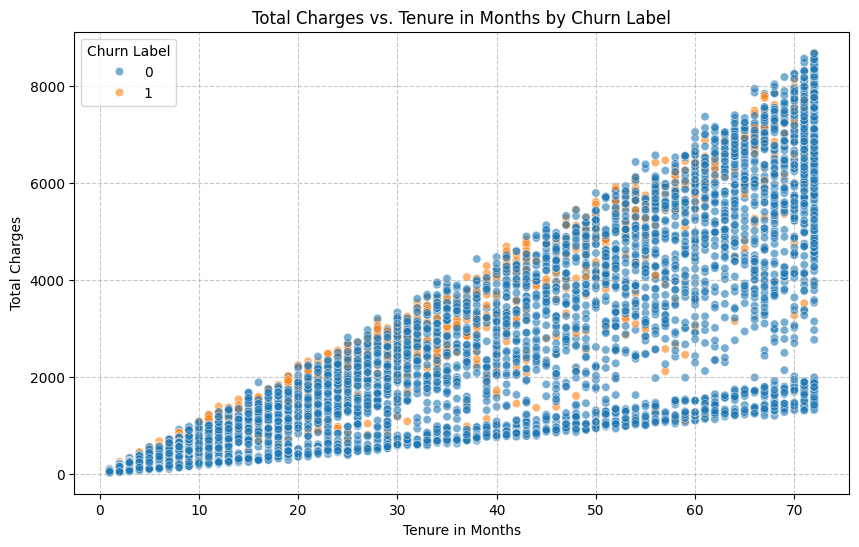

In [25]:
# --- Plotting Total Charges vs Tenure ---
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Tenure in Months', y='Total Charges', hue='Churn Label', alpha=0.6)
plt.title('Total Charges vs. Tenure in Months by Churn Label')
plt.xlabel('Tenure in Months')
plt.ylabel('Total Charges')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

In [26]:
print("\n--- Analysis of Total Revenue ---")
print("\nDescriptive statistics for Total Revenue by Churn Label:")
print(data.groupby('Churn Label')['Total Revenue'].describe())

print("\nValue counts for Total Revenue (first 10 unique values):")
print(data['Total Revenue'].value_counts().head(10))


--- Analysis of Total Revenue ---

Descriptive statistics for Total Revenue by Churn Label:
              count         mean          std    min      25%       50%  \
Churn Label                                                               
0            5174.0  3418.374927  2910.764954  21.36  938.575  2579.325   
1            1869.0  1971.353569  2438.441813  21.61  175.850   893.550   

                  75%       max  
Churn Label                      
0            5463.415  11979.34  
1            2888.760  11195.44  

Value counts for Total Revenue (first 10 unique values):
Total Revenue
24.80      3
116.27     3
66.56      3
68.41      3
88.75      2
23.24      2
3386.40    2
60.38      2
57.81      2
1727.35    2
Name: count, dtype: int64


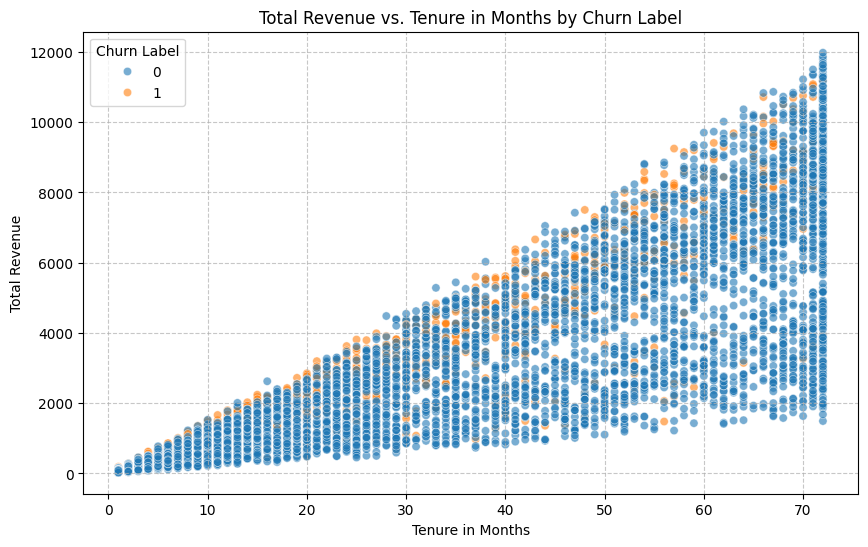

In [27]:
# --- Plotting Total Revenue vs Tenure ---
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Tenure in Months', y='Total Revenue', hue='Churn Label', alpha=0.6)
plt.title('Total Revenue vs. Tenure in Months by Churn Label')
plt.xlabel('Tenure in Months')
plt.ylabel('Total Revenue')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

In [28]:
print("\n--- Analysis of Satisfaction Score ---")
print("\nUnique values and their counts for Satisfaction Score:")
print(data['Satisfaction Score'].value_counts())
print("\nDescriptive statistics for Satisfaction Score by Churn Label:")
print(data.groupby('Churn Label')['Satisfaction Score'].describe())


--- Analysis of Satisfaction Score ---

Unique values and their counts for Satisfaction Score:
Satisfaction Score
3    2665
4    1789
5    1149
1     922
2     518
Name: count, dtype: int64

Descriptive statistics for Satisfaction Score by Churn Label:
              count      mean       std  min  25%  50%  75%  max
Churn Label                                                     
0            5174.0  3.789911  0.781162  3.0  3.0  4.0  4.0  5.0
1            1869.0  1.736223  0.808466  1.0  1.0  2.0  2.0  3.0


In [29]:
print("\n--- Analysis of Churn Score ---")
print("\nUnique values and their counts for Churn Score:")
print(data['Churn Score'].value_counts())
print("\nDescriptive statistics for Churn Score by Churn Label:")
print(data.groupby('Churn Label')['Churn Score'].describe())
print("\nChurn Label by Churn Score:")
print(pd.crosstab(data['Churn Label'], data['Churn Score']))


--- Analysis of Churn Score ---

Unique values and their counts for Churn Score:
Churn Score
91    202
80    150
71    148
77    145
67    142
     ... 
88     33
9       3
8       2
7       2
5       1
Name: count, Length: 81, dtype: int64

Descriptive statistics for Churn Score by Churn Label:
              count       mean        std   min   25%   50%   75%   max
Churn Label                                                            
0            5174.0  50.098183  17.702277   5.0  35.0  50.0  66.0  80.0
1            1869.0  81.777956   9.166870  65.0  74.0  83.0  90.0  96.0

Churn Label by Churn Score:
Churn Score  5   7   8   9   20  21  22  23  24  25  ...  87  88  89   90  \
Churn Label                                          ...                    
0             1   2   2   3  83  84  82  78  86  85  ...   0   0   0    0   
1             0   0   0   0   0   0   0   0   0   0  ...  65  33  60  139   

Churn Score   91  92  93  94  95  96  
Churn Label                          

In [30]:
print("\n--- Analysis of CLTV (Customer Lifetime Value) ---")
print("\nDescriptive statistics for CLTV by Churn Label:")
print(data.groupby('Churn Label')['CLTV'].describe())


--- Analysis of CLTV (Customer Lifetime Value) ---

Descriptive statistics for CLTV by Churn Label:
              count         mean          std     min      25%     50%  \
Churn Label                                                              
0            5174.0  4490.921337  1167.703198  2003.0  3643.75  4620.0   
1            1869.0  4149.414660  1189.370707  2003.0  3101.00  4238.0   

                 75%     max  
Churn Label                   
0            5434.75  6500.0  
1            5166.00  6484.0  


In [31]:
# From the above obersation we can detect a significant data leakage to our model
# So it is very much crucial to drop these columns
data = data.drop(['Total Charges', 'Total Revenue', 'Satisfaction Score', 'Churn Score'], axis=1)

## **4. Data Preprocessing and Feature Engineering**

This section outlines the steps taken to prepare the raw data for machine learning models. This includes separating features by their data types and applying appropriate transformations.

In [32]:
features = data.drop(['Churn Label'],axis=1)
labels = data['Churn Label']

### **4.1. Feature Segregation**

We categorize features into numerical and categorical types to apply distinct preprocessing pipelines.

In [33]:
num_cols = list(features.select_dtypes(['int64','float64']).columns)
cat_cols = list(features.select_dtypes(include='object').columns)

In [34]:
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore', sparse_output=False) # sparse_output=False for dense array output

### **4.2. Preprocessing Pipeline**

A `ColumnTransformer` is used to apply different preprocessing steps to numerical and categorical features:
* **Numerical Features:** Scaled using `StandardScaler` to normalize their ranges.
* **Categorical Features:** Converted into numerical format using `OneHotEncoder`.

This ensures that all features are in a suitable format for model training.

In [35]:
preprocessor = ColumnTransformer([('num',numerical_transformer,num_cols),('cat',categorical_transformer,cat_cols)],
                                  remainder='passthrough',verbose_feature_names_out=False)

In [36]:
X_processed_array = preprocessor.fit_transform(features)
feature_names = preprocessor.get_feature_names_out()
X_processed = pd.DataFrame(X_processed_array, columns=feature_names, index=features.index)
print(X_processed.head())

        Age  Number of Dependents  Zip Code  Latitude  Longitude  Population  \
0  1.880110             -0.486835 -1.865778 -0.880463   0.742757    2.201392   
1  1.641292              0.551874 -1.843695 -0.872175   0.729456    1.585200   
2  1.462179              2.629292 -1.842618 -0.846023   0.708810    1.200630   
3  1.880110              0.551874 -1.714429 -0.915913   0.661033    0.266580   
4  1.999519              0.551874 -1.553385 -0.901401   0.806071    0.195046   

   Number of Referrals  Tenure in Months  Avg Monthly Long Distance Charges  \
0            -0.650409         -1.278988                          -1.486303   
1            -0.317185         -0.993743                           1.676120   
2            -0.650409         -0.586250                          -0.752828   
3            -0.317185         -0.301005                          -0.207092   
4            -0.317185          0.187986                          -1.076516   

   Avg Monthly GB Download  ...  Unlimited D

### **4.3. Data Splitting**

The dataset is split into training and testing sets to evaluate the model's performance on unseen data. A standard 80/20 split (or similar) is applied, ensuring reproducibility with a `random_state`.

In [37]:
X_train, X_test, y_train, y_test = train_test_split(
    X_processed, labels, test_size=0.2, random_state=42, stratify=labels
)

print("\ny_train distribution:")
print(y_train.value_counts(normalize=True))

print("\ny_test distribution:")
print(y_test.value_counts(normalize=True))


y_train distribution:
Churn Label
0    0.734647
1    0.265353
Name: proportion, dtype: float64

y_test distribution:
Churn Label
0    0.734564
1    0.265436
Name: proportion, dtype: float64


### **5.1. Hyperparameter Tuning with GridSearchCV (GPU Accelerated)**

To optimize the XGBoost model's performance, `GridSearchCV` from `cuml.model_selection` (leveraging GPU acceleration for faster computation) is employed. This systematically searches for the best combination of hyperparameters, such as `n_estimators`, `max_depth`, `learning_rate`, and `subsample`, that yield the highest accuracy on the validation set.

In [38]:
# --- XGBoost Classifier with GPU ---
print("\n--- XGBoost Classifier (GPU Enabled) ---")

xgb_model = xgb.XGBClassifier(
    objective='binary:logistic', # For binary classification
    eval_metric='logloss',       # A common evaluation metric
    tree_method='hist',          # Use histogram-based tree method (required for GPU)
    device='cuda',               # Tell XGBoost to use the GPU
    random_state=42,             # For reproducibility
    n_estimators=100,            # Number of boosting rounds (can be tuned)
    learning_rate=0.1,            # Step size shrinkage (can be tuned)
)

# Fit the Model with Early Stopping Parameters ---
print("\nStarting XGBoost training with early stopping...")
xgb_model.fit(
    X_train, y_train,
)


y_pred_xgb = xgb_model.predict(X_test)
y_proba_xgb = xgb_model.predict_proba(X_test)[:, 1] # Probability of the positive class (churn=1)


--- XGBoost Classifier (GPU Enabled) ---

Starting XGBoost training with early stopping...


/home/play_box/.venvs/rapids_python3.12/lib/python3.12/site-packages/xgboost/core.py:729: UserWarning: [04:52:26] WARNING: /workspace/src/common/error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.

  return func(**kwargs)


### **6.1. Performance Metrics**

* **Accuracy Score:** The proportion of correctly classified instances.
* **Classification Report:** Provides precision, recall, and F1-score for each class (churned/not churned), which are crucial for imbalanced datasets.
* **Confusion Matrix:** A table that visualizes the performance of a classification model, showing true positives, true negatives, false positives, and false negatives.
* **ROC AUC Score:** Measures the model's ability to distinguish between classes. A higher AUC indicates better discrimination.

In [39]:
print(f"Accuracy: {accuracy_score(y_test, y_pred_xgb):.4f}")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_xgb))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_xgb))
print(f"ROC AUC Score: {roc_auc_score(y_test, y_proba_xgb):.4f}")

Accuracy: 0.8573

Confusion Matrix:
[[958  77]
 [124 250]]

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.93      0.91      1035
           1       0.76      0.67      0.71       374

    accuracy                           0.86      1409
   macro avg       0.82      0.80      0.81      1409
weighted avg       0.85      0.86      0.85      1409

ROC AUC Score: 0.9159


In [40]:
# --- Logistic Regression ---
print("--- Logistic Regression ---")
lr_model = LogisticRegression(random_state=42, solver='liblinear', max_iter=1000) # solver='liblinear' is good for small datasets and L1/L2 regularization
lr_model.fit(X_train, y_train)

y_pred_lr = lr_model.predict(X_test)
y_proba_lr = lr_model.predict_proba(X_test)[:, 1] # Probability of the positive class (churn=1)

print(f"Accuracy: {accuracy_score(y_test, y_pred_lr):.4f}")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_lr))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_lr))
print(f"ROC AUC Score: {roc_auc_score(y_test, y_proba_lr):.4f}")


--- Logistic Regression ---
Accuracy: 0.8346

Confusion Matrix:
[[941  94]
 [139 235]]

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.91      0.89      1035
           1       0.71      0.63      0.67       374

    accuracy                           0.83      1409
   macro avg       0.79      0.77      0.78      1409
weighted avg       0.83      0.83      0.83      1409

ROC AUC Score: 0.9023


In [41]:
# --- Random Forest ---
print("\n--- Random Forest Classifier ---")
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)
y_proba_rf = rf_model.predict_proba(X_test)[:, 1]

print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))
print(f"ROC AUC Score: {roc_auc_score(y_test, y_proba_rf):.4f}")


--- Random Forest Classifier ---
Accuracy: 0.8417

Confusion Matrix:
[[981  54]
 [169 205]]

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.95      0.90      1035
           1       0.79      0.55      0.65       374

    accuracy                           0.84      1409
   macro avg       0.82      0.75      0.77      1409
weighted avg       0.84      0.84      0.83      1409

ROC AUC Score: 0.8943


In [42]:
#  Hyperparameter Tuning for XGBoost

param_grid = {
    'n_estimators': [100, 200, 300], # Number of boosting rounds
    'learning_rate': [0.05, 0.1, 0.2], # Step size shrinkage
    'max_depth': [3, 5, 7],           # Maximum depth of a tree
    'subsample': [0.7, 0.9],          # Subsample ratio of the training instance
    'colsample_bytree': [0.7, 0.9],   # Subsample ratio of columns when constructing each tree
    'gamma': [0, 0.1, 0.2]            # Minimum loss reduction required to make a further partition
}

# Initialize GridSearchCV
grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    scoring='roc_auc',  # Optimize for ROC AUC score
    cv=3,               # 3-fold cross-validation
    verbose=2
)

# Fit the GridSearchCV to your training data
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 324 candidates, totalling 972 fits
[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=100, subsample=0.7; total time=   1.1s
[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=100, subsample=0.7; total time=   1.1s
[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=100, subsample=0.7; total time=   1.1s
[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=100, subsample=0.9; total time=   1.1s
[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=100, subsample=0.9; total time=   1.1s
[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=100, subsample=0.9; total time=   1.0s
[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=200, subsample=0.7; total time=   1.5s
[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.05, ma

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device='cuda',
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     feature_weights=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constrai...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=100,
                                     n_jobs=None, num_parallel_tree=None, ...),
             param_grid={'colsample_bytree': [0.7, 0.9], 'gamma': [0, 0.1, 0.2],
                         'learning_rate': [0.05, 0.1, 0.2],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [100, 200, 300],
                         'subsample': [0.7, 0.9]},
             scoring='roc_auc', verbose=2)

In [43]:
# Print the best parameters and best score found
print("\n--- GridSearchCV Results ---")
print(f"Best parameters found: {grid_search.best_params_}")
print(f"Best ROC AUC score (on training data with CV): {grid_search.best_score_:.4f}")


--- GridSearchCV Results ---
Best parameters found: {'colsample_bytree': 0.7, 'gamma': 0.2, 'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 200, 'subsample': 0.9}
Best ROC AUC score (on training data with CV): 0.9145


In [44]:
# You can also access the best estimator directly
best_xgb_model = grid_search.best_estimator_

# --- Evaluate the Best Model on the Test Set ---
print("\n--- Evaluation of Best XGBoost Model on Test Set ---")
y_pred_best_xgb = best_xgb_model.predict(X_test)
y_proba_best_xgb = best_xgb_model.predict_proba(X_test)[:, 1]
print(f"Accuracy: {accuracy_score(y_test, y_pred_best_xgb):.4f}")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_best_xgb))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_best_xgb))
print(f"ROC AUC Score: {roc_auc_score(y_test, y_proba_best_xgb):.4f}")


--- Evaluation of Best XGBoost Model on Test Set ---
Accuracy: 0.8581

Confusion Matrix:
[[957  78]
 [122 252]]

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.92      0.91      1035
           1       0.76      0.67      0.72       374

    accuracy                           0.86      1409
   macro avg       0.83      0.80      0.81      1409
weighted avg       0.85      0.86      0.86      1409

ROC AUC Score: 0.9169


### **7.1. XGBoost Feature Importance (Gain)**

The bar plot below illustrates the relative importance of each feature based on 'gain'. A longer bar indicates a more important feature, meaning it contributed more to the model's overall predictive power. Analyzing these features helps in understanding the key drivers of customer churn.


In [46]:
# --- 1. Get Feature Importances ---
# The feature_importances_ attribute gives you the importance scores
importances = xgb_model.feature_importances_

# --- 2. Get Feature Names ---
feature_names = X_train.columns

# --- 3. Create a DataFrame for better visualization and sorting ---
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the top N most important features
n_top_features = 20 # You can adjust this number
print(f"\n--- Top {n_top_features} Feature Importances (Type: Gain) ---")
print(feature_importance_df.head(n_top_features))


--- Top 20 Feature Importances (Type: Gain) ---
                          Feature  Importance
1168      Contract_Month-to-Month    0.437010
1150    Internet Type_Fiber Optic    0.041008
1170            Contract_Two Year    0.032735
1174   Payment Method_Credit Card    0.031492
6             Number of Referrals    0.027000
1            Number of Dependents    0.022910
881                City_San Diego    0.022253
1169            Contract_One Year    0.019356
0                             Age    0.018020
21                     Married_No    0.015328
1162          Streaming Movies_No    0.013788
1171         Paperless Billing_No    0.013129
7                Tenure in Months    0.013012
1152           Online Security_No    0.012906
10                 Monthly Charge    0.012663
1160              Streaming TV_No    0.012221
1164           Streaming Music_No    0.010958
1158      Premium Tech Support_No    0.010638
378                   City_Fresno    0.010372
13    Total Long Distance Charg

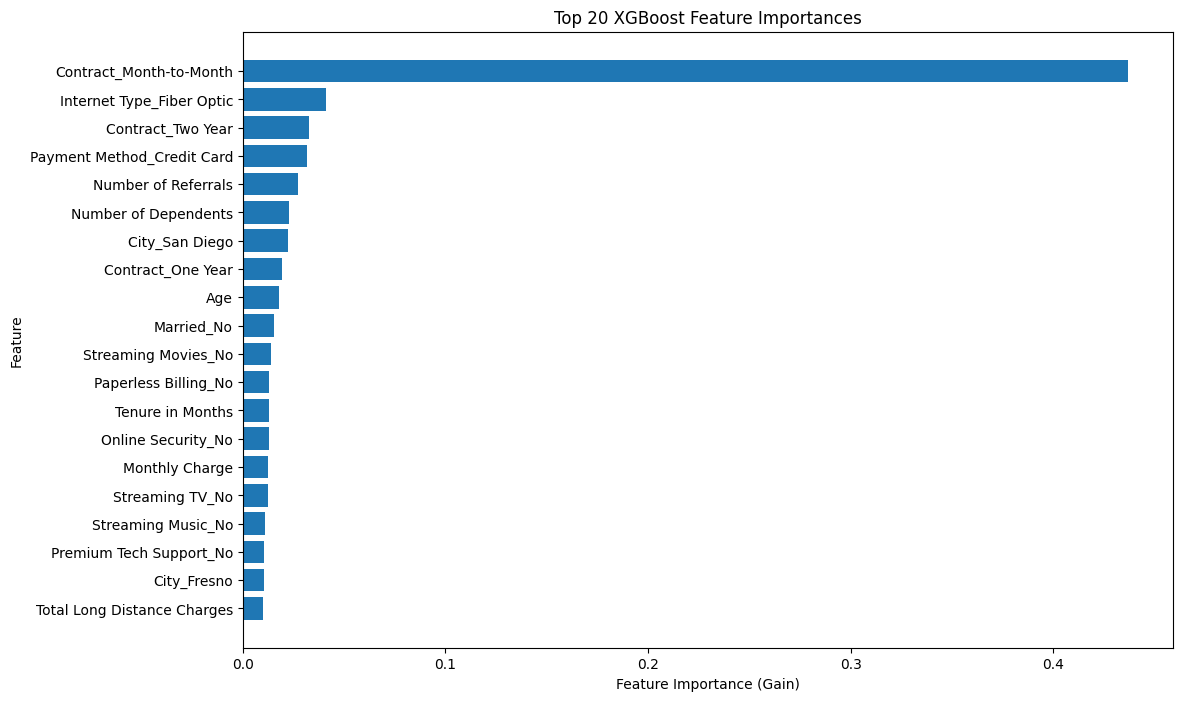

In [47]:
# --- 4. Visualize Feature Importances ---
plt.figure(figsize=(12, 8))
plt.barh(feature_importance_df['Feature'].head(n_top_features),
         feature_importance_df['Importance'].head(n_top_features))
plt.xlabel("Feature Importance (Gain)")
plt.ylabel("Feature")
plt.title(f"Top {n_top_features} XGBoost Feature Importances")
plt.gca().invert_yaxis() # Display highest importance at the top
plt.show()

In [48]:
print("\n--- Interpretation Guidelines ---")
print("The bar plot shows the relative importance of each feature based on 'gain'.")
print("A longer bar indicates a more important feature, meaning it contributed more to the model's overall predictive power.")
print("Focus on these features to understand the key drivers of customer churn.")


--- Interpretation Guidelines ---
The bar plot shows the relative importance of each feature based on 'gain'.
A longer bar indicates a more important feature, meaning it contributed more to the model's overall predictive power.
Focus on these features to understand the key drivers of customer churn.
